In [1]:
text = "This is my test text. We're keeping this text short to keep things manageable."

def count_words(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary where keys
    are unique words and values are word counts.
    """
    text = text.lower()
    skips = [".",",",":",";","'",'"']
    for ch in skips :
        text = text.replace(ch, "")
    
    word_counts = {}
    for word in text.split(" "):
        #known words 
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
            
    return word_counts


count_words(text)

{'this': 2,
 'is': 1,
 'my': 1,
 'test': 1,
 'text': 2,
 'were': 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable': 1}

In [2]:
from collections import Counter 

def count_words_fast(text):
    
    """
    Count the number of times each word occurs in text (str). Return dictionary where keys
    are unique words and values are word counts.
    """
    
    text = text.lower()
    skips = [".",",",":",";","'",'"']
    for ch in skips :
        text = text.replace(ch, "")
    
    word_counts =Counter(text.split(" "))
   
            
    return word_counts

count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'my': 1,
         'test': 1,
         'text': 2,
         'were': 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageable': 1})

In [3]:
count_words_fast(text) == count_words(text)

True

In [4]:
def read_book (title_path):
    """ Read a book and return it as a string
    """
    
    with open (title_path, "r", encoding = "utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return text
        

In [5]:
pwd

'C:\\Users\\skris\\JupyterLAB\\Book'

In [6]:
text = read_book("English/shakespeare/Romeo and Juliet.txt")
len(text)

169275

In [7]:
ind=text.find("What's in a name?")
ind

42757

In [8]:
sample_text = text [ind : ind + 1000]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [61]:
def word_stats(word_counts):
    """
    return unique words with count
    """
    num_unique = len(word_counts)
    counts= word_counts.values()
    return (num_unique, counts)

word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts) 
print(num_unique)
print(sum( counts))

9700
30567


In [87]:
import os
book_dir = "./books"

import pandas as pd
stats = pd.DataFrame(columns =("language", "author", "title", "total", "unique"))
title_num = 1

for language in os.listdir(book_dir):
    
    for author in os.listdir(book_dir + "/" + language):
        
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print (inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text)) 
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique 
            title_num += 1
            

./books/English/shakespeare/A Midsummer Night's Dream.txt
./books/English/shakespeare/Hamlet.txt
./books/English/shakespeare/Macbeth.txt
./books/English/shakespeare/Othello.txt
./books/English/shakespeare/Richard III.txt
./books/English/shakespeare/Romeo and Juliet.txt
./books/English/shakespeare/The Merchant of Venice.txt
./books/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./books/French/chevalier/L'åle de sable.txt
./books/French/chevalier/La capitaine.txt
./books/French/chevalier/La fille des indiens rouges.txt
./books/French/chevalier/La fille du pirate.txt
./books/French/chevalier/Le chasseur noir.txt
./books/French/chevalier/Les derniers Iroquois.txt
./books/French/de Maupassant/Boule de Suif.txt
./books/French/de Maupassant/Claire de Lune.txt
./books/French/de Maupassant/Contes de la Becasse.txt
./books/French/de Maupassant/L'inutile beautÇ.txt
./books/French/de Maupassant/La Main Gauche.txt
./books/French/de Maupassant/La Maison Tellier.txt
./books/French/de Mau

In [89]:
stats

,language,author,title,total,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
...,...,...,...,...,...
98,Portuguese,Queir¢s,O crime do padre Amaro,128630,29300
99,Portuguese,Queir¢s,O Mandarim,21440,7836
100,Portuguese,Queir¢s,O Primo Bazilio,107303,27644
101,Portuguese,Queir¢s,Os Maias,195771,40665


In [88]:
stats.head()

,language,author,title,total,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


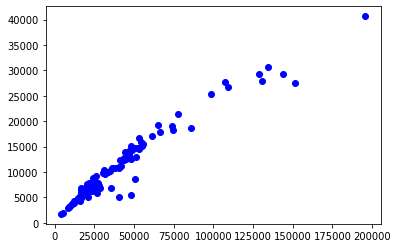

In [90]:
import matplotlib.pyplot as plt
plt.plot(stats.total,stats.unique,"bo")

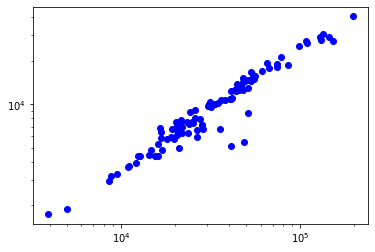

In [91]:
plt.loglog(stats.total,stats.unique,"bo")

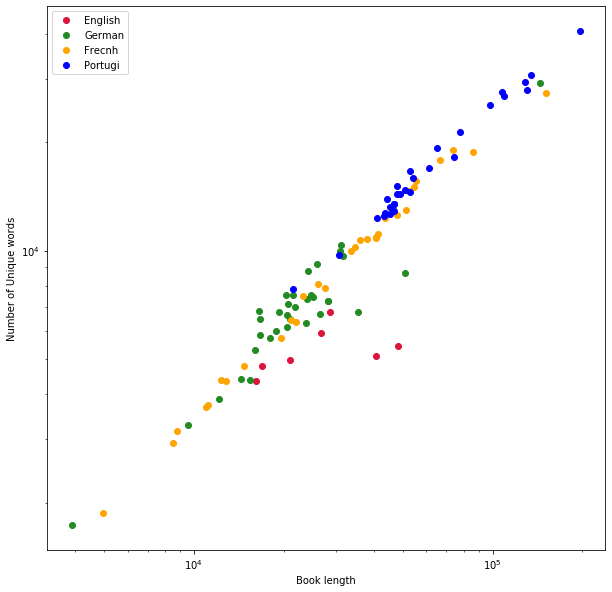

In [96]:
plt.figure(figsize =(10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.total, subset.unique,"o", label= "English", color= "crimson")

subset = stats[stats.language == "German"]
plt.loglog(subset.total, subset.unique,"o", label= "German", color= "forestgreen")

subset = stats[stats.language == "French"]
plt.loglog(subset.total, subset.unique,"o", label= "Frecnh", color= "orange")

subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.total, subset.unique,"o", label= "Portugi", color ="blue")

plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of Unique words")
plt.savefig("lang_plot.pdf")